In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers Dataset/train'
valid_path = 'flowers Dataset/val'
test_path = 'flowers Dataset/test'

In [4]:
# useful for getting number of output classes
folders = glob('flowers Dataset/train/*')

In [5]:
folders

['flowers Dataset/train\\daisy',
 'flowers Dataset/train\\dandelion',
 'flowers Dataset/train\\rose',
 'flowers Dataset/train\\sunflower',
 'flowers Dataset/train\\tulip']

In [6]:
from tensorflow.keras.layers import Dropout

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    ##
                                    tf.keras.layers.Dense(5,activation = 'softmax'),
                                    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   ) 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory('flowers Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 ) 

Found 2593 images belonging to 5 classes.


In [12]:
valid_generator = train_datagen.flow_from_directory('flowers Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            ) 

Found 860 images belonging to 5 classes.


In [13]:
test_generator = test_datagen.flow_from_directory('flowers Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False,
                                            )

Found 870 images belonging to 5 classes.


In [14]:
earlystopper=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=30,
  steps_per_epoch=len(train_generator),
  validation_steps=len(valid_generator),
  callbacks = [earlystopper]  
)

Epoch 1/30
82/82 [==============================] - 68s 663ms/step - loss: 1.5248 - accuracy: 0.3448 - val_loss: 1.2920 - val_accuracy: 0.4558
Epoch 2/30
82/82 [==============================] - 32s 394ms/step - loss: 1.2162 - accuracy: 0.4801 - val_loss: 1.1484 - val_accuracy: 0.4977
Epoch 3/30
82/82 [==============================] - 33s 401ms/step - loss: 1.1138 - accuracy: 0.5426 - val_loss: 1.1031 - val_accuracy: 0.5465
Epoch 4/30
82/82 [==============================] - 33s 399ms/step - loss: 1.0874 - accuracy: 0.5577 - val_loss: 1.1246 - val_accuracy: 0.5349
Epoch 5/30
82/82 [==============================] - 33s 399ms/step - loss: 1.0387 - accuracy: 0.5870 - val_loss: 0.9990 - val_accuracy: 0.6256
Epoch 6/30
82/82 [==============================] - 33s 403ms/step - loss: 0.9133 - accuracy: 0.6363 - val_loss: 0.9773 - val_accuracy: 0.6140
Epoch 7/30
82/82 [==============================] - 33s 398ms/step - loss: 0.8651 - accuracy: 0.6595 - val_loss: 0.8764 - val_accuracy: 0.6733

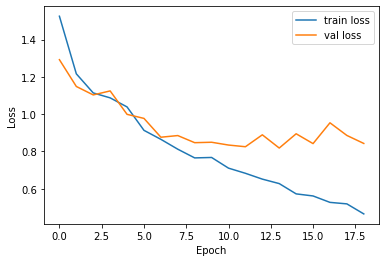

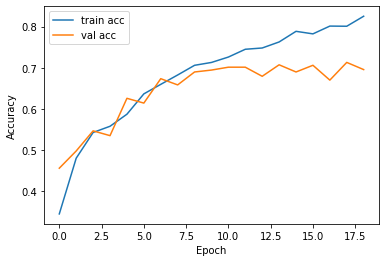

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

870/870 - 10s - loss: 0.7942 - accuracy: 0.7172

Test accuracy: 0.7172414064407349
Test loss: 0.7942208647727966


In [18]:
test_generator.reset()
# get the ground truth of your data. 
y_true = test_generator.classes 

# predict the probability distribution of the data
predictions = model.predict(test_generator, verbose=2)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=1)

# get the classification report
print(classification_report(y_true, y_pred))

870/870 - 2s
              precision    recall  f1-score   support

           0       0.83      0.57      0.67       155
           1       0.70      0.85      0.77       211
           2       0.63      0.66      0.64       158
           3       0.80      0.74      0.77       148
           4       0.70      0.72      0.71       198

    accuracy                           0.72       870
   macro avg       0.73      0.71      0.71       870
weighted avg       0.73      0.72      0.72       870



In [19]:
print(confusion_matrix(y_true, y_pred))

[[ 88  33  22   6   6]
 [  9 180   3  14   5]
 [  5   8 104   1  40]
 [  1  24   4 110   9]
 [  3  13  33   7 142]]


In [21]:
list(train_generator.class_indices.keys())

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

ROC AUC score: 0.8180783804877121


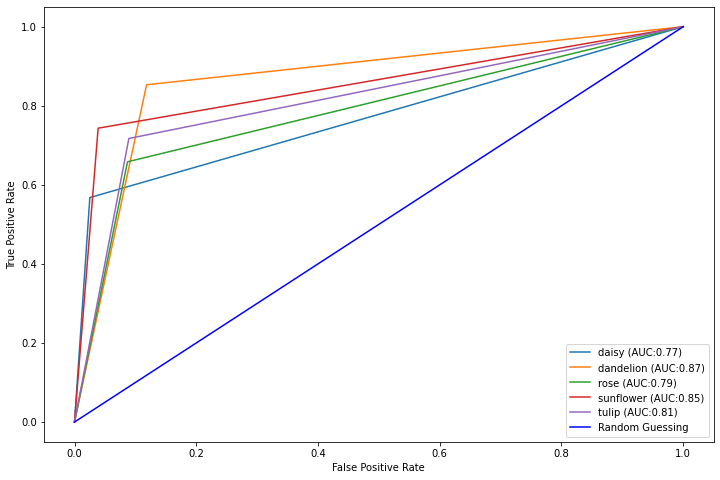

In [23]:
all_labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_true)
    y_true = lb.transform(y_true)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels):
        fpr, tpr, thresholds = roc_curve(y_true[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_true, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [25]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Bunga weight/Deep_bunga.h5')

test accuracy : 71.72413793103448


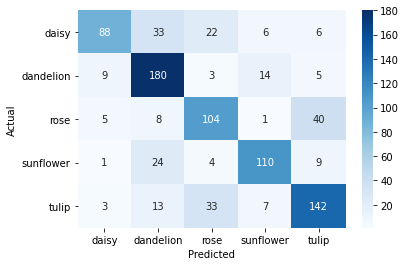

In [26]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

model = tf.keras.models.load_model('Bunga weight/Deep_bunga.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
   X_test,Y_test = test_generator.next()
   y_prob.append(model.predict(X_test))
   y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [47]:
import cv2

In [17]:
import skimage

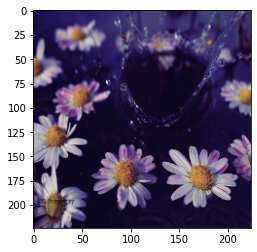

In [55]:
from skimage.transform import resize
new_image = plt.imread('flowers Dataset/test/daisy/10172567486_2748826a8b.jpg')
resize_image = resize(new_image, (224,224,3))
img = plt.imshow(resize_image)


In [33]:
predictions = model.predict(np.array([resize_image]))
predictions


array([[0.02945642, 0.83553576, 0.05553799, 0.01939504, 0.06007482]],
      dtype=float32)

In [2]:
model = tf.keras.models.load_model('Bunga weight/Deep_bunga.h5')

In [3]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

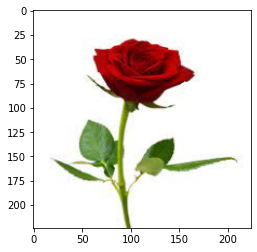

In [5]:
from skimage.transform import resize
new_image = plt.imread('rose.jfif')
resize_image = resize(new_image, (224,224,3))
img = plt.imshow(resize_image)

In [10]:
predictions = model.predict(np.array([resize_image]))
print(predictions)

[[2.8102960e-02 1.9574234e-06 8.3706754e-01 1.9521998e-04 1.3463238e-01]]


In [17]:
classes = model.predict_classes(np.array([resize_image]))
print(classes)

[2]


C:\Users\DELL\anaconda3\envs\marzharenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [3]:
model = tf.keras.models.load_model('Bunga weight/Deep_bunga.h5')

In [4]:
test_image = image.load_img('rose.jfif', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [5]:
print(result)

[[1.3101364e-02 2.3910101e-07 8.3560628e-01 7.3301737e-05 1.5121880e-01]]


In [6]:
a=np.argmax(model.predict(test_image), axis=1)

In [20]:
   if(a==0):
    print("daisy")
elif (a==1):
    print("dandelion")
elif (a==2):
     print("rose")
elif (a==3):
     print("sunflower")
else:
     print("tulip")

rose


In [14]:
results = [[1.3101364e-02], [2.3910101e-07], [8.3560628e-01], [7.3301737e-05], [1.5121880e-01]]

In [15]:
for i in range(len(results)):
    for x in result:
        print(x[i])

0.013101364
2.39101e-07
0.8356063
7.330174e-05
0.1512188


In [22]:
print('rose: 0.8356063 ')

rose: 0.8356063 
